In [1]:
import numpy as np
import pandas as pd

In [2]:

# Load back the arrays
A_array_loaded = pd.read_csv('A1.csv').to_numpy()
B_array_loaded = pd.read_csv('B1.csv').to_numpy()
C_array_loaded = pd.read_csv('C1.csv').to_numpy()
D_array_loaded = pd.read_csv('D1.csv').to_numpy()

# Check shapes
print("A_array:", A_array_loaded.shape)
print("B_array:", B_array_loaded.shape)
print("C_array:", C_array_loaded.shape)
print("D_array:", D_array_loaded.shape)


A_array: (41, 21)
B_array: (635, 21)
C_array: (5954, 21)
D_array: (993, 21)


In [3]:
# Features extracted from images 

#   0      1       2     3      4      5      6     7     8    9    10    11     12       13       14      15    16    17    18    19      20
# "Bm", "DOL1", "DOL2", "e1", "e2", "e2/e1", "e3", "e4", "E", "Q", "Q1", "Q2", "vmaxL", "vmaxR", "vmax" , "L1", "D1", "L2", "D2", "Age", "DoL1/DOL2"

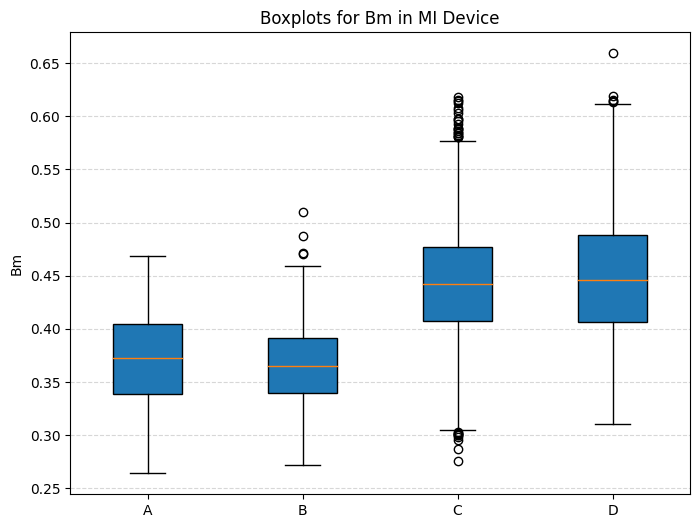

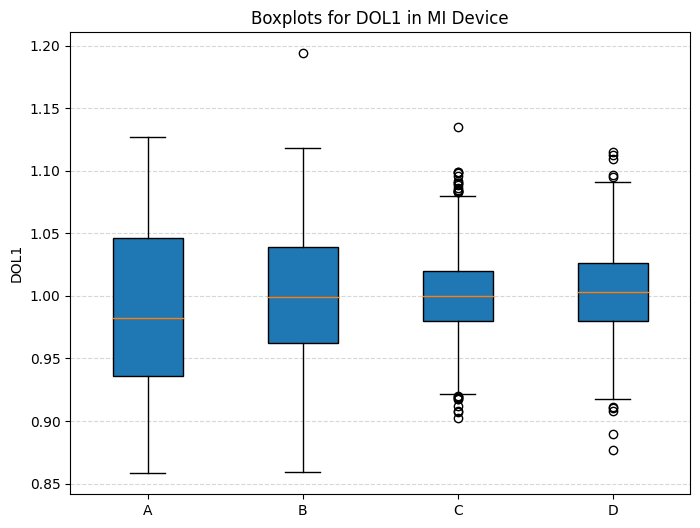

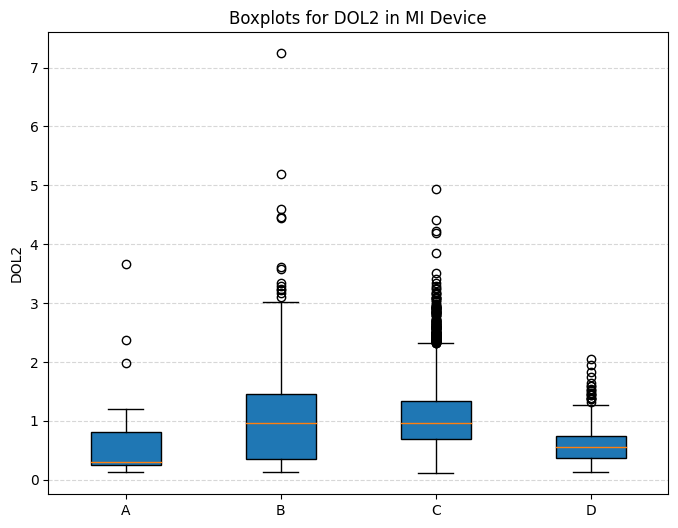

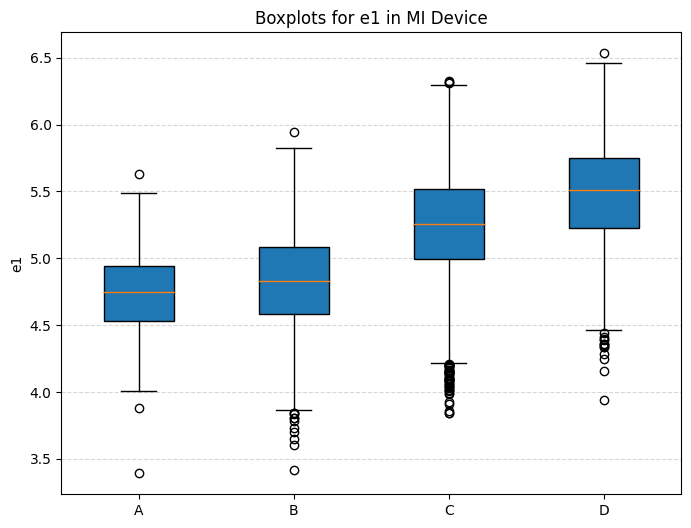

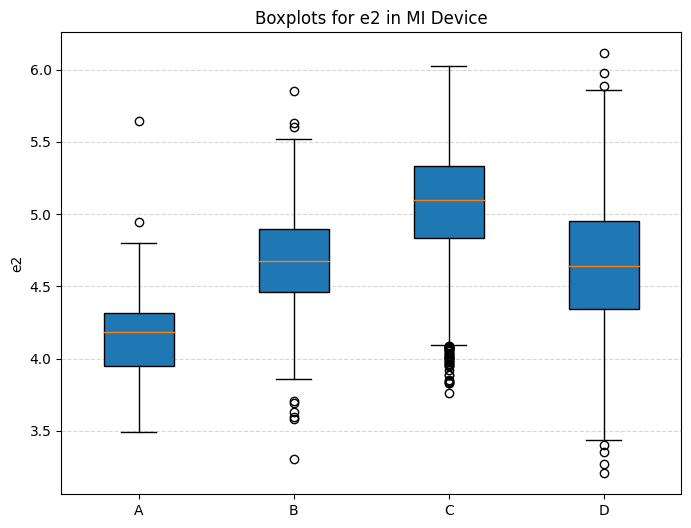

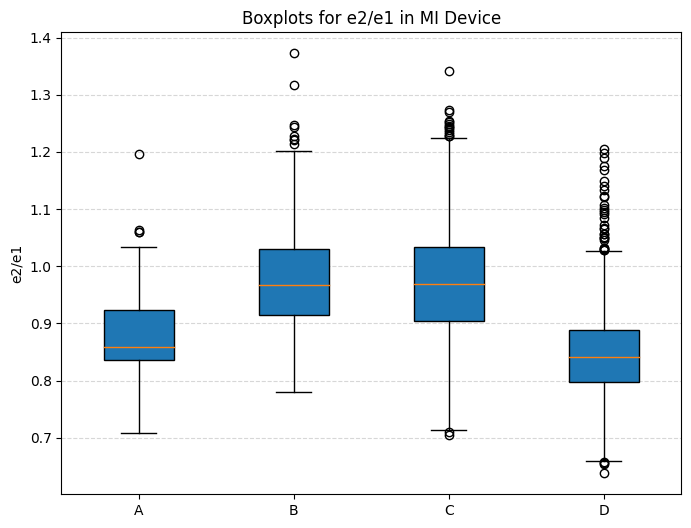

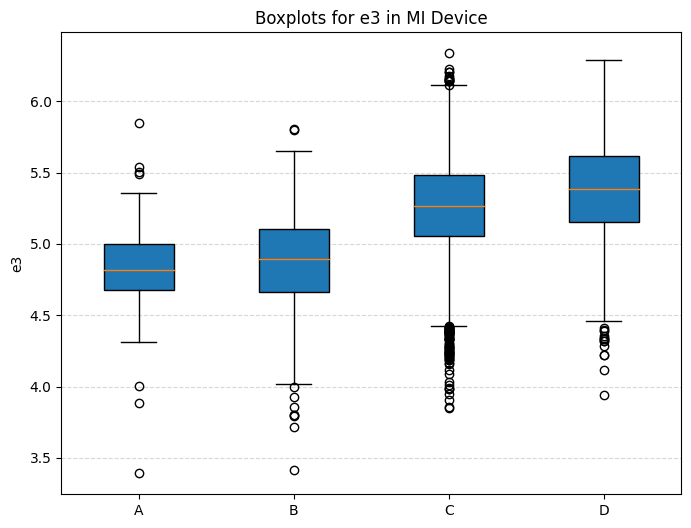

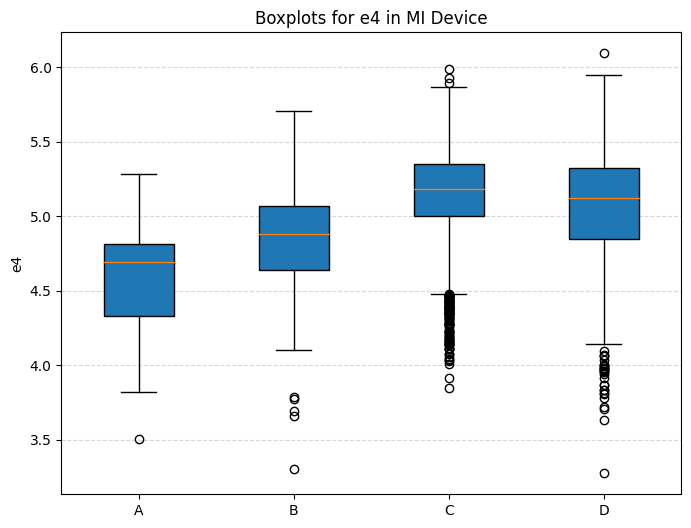

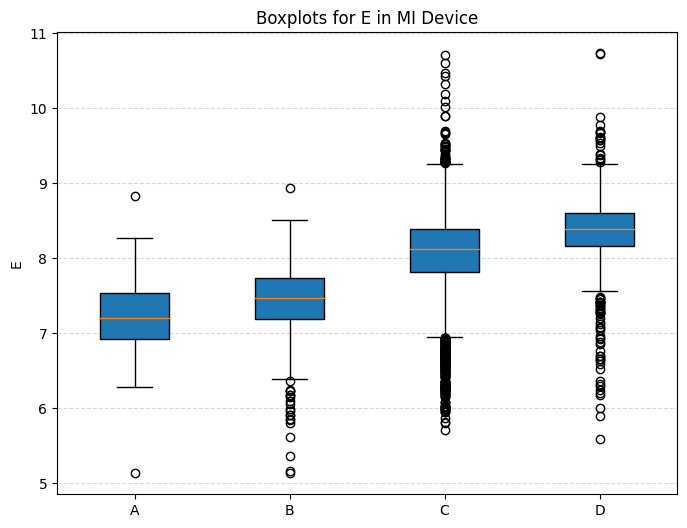

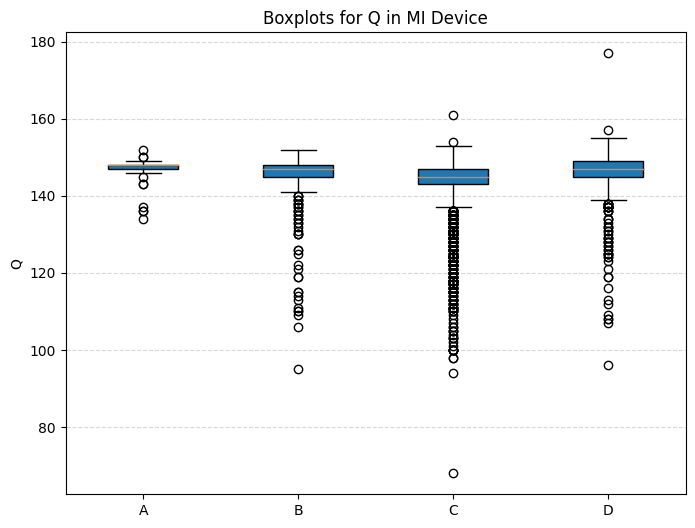

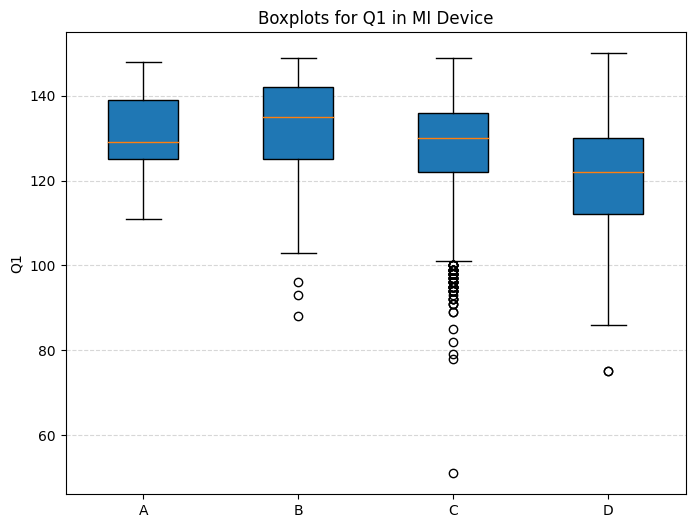

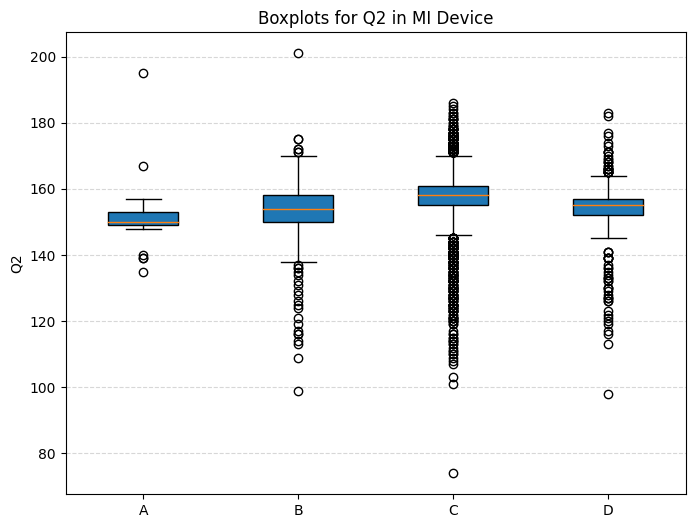

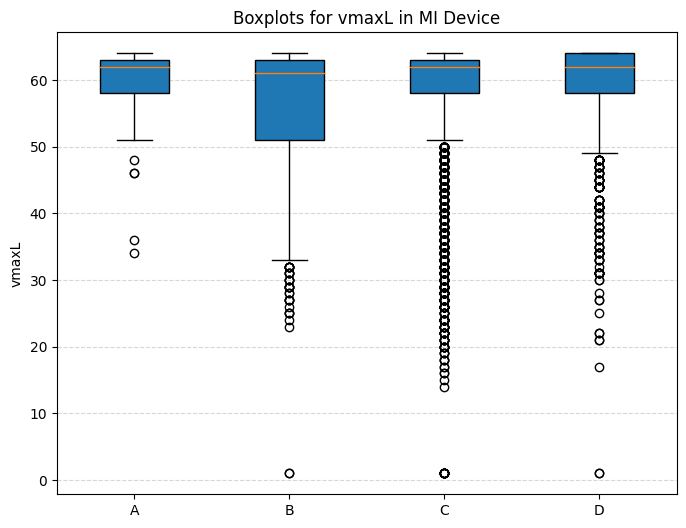

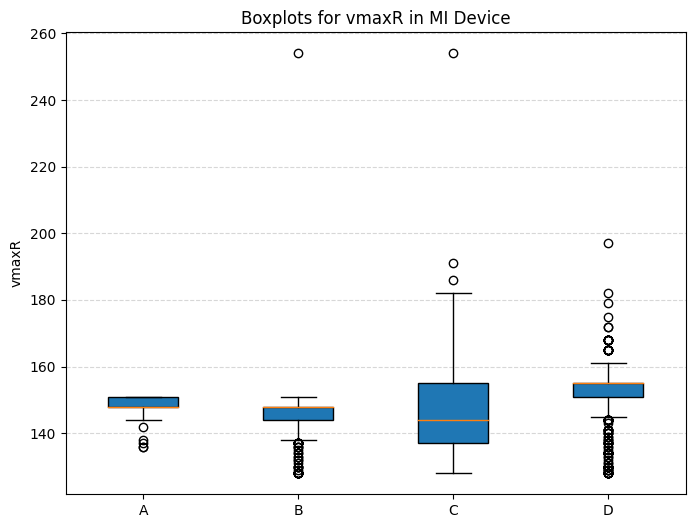

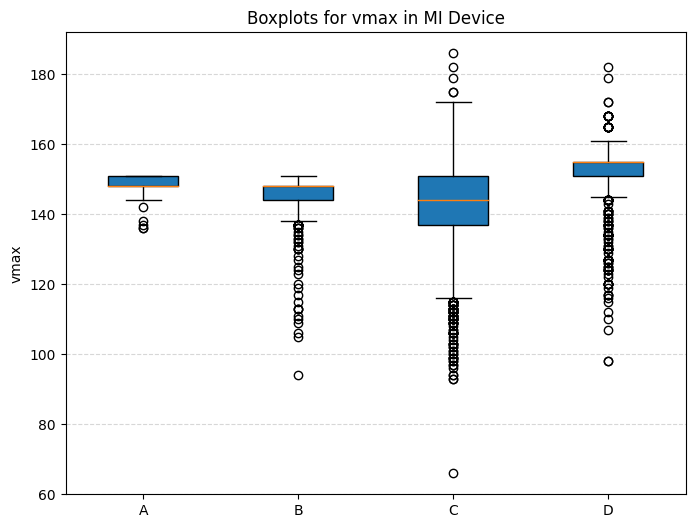

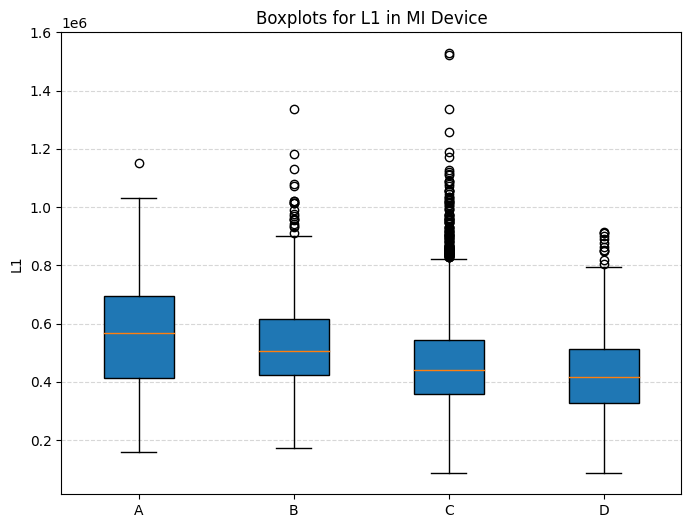

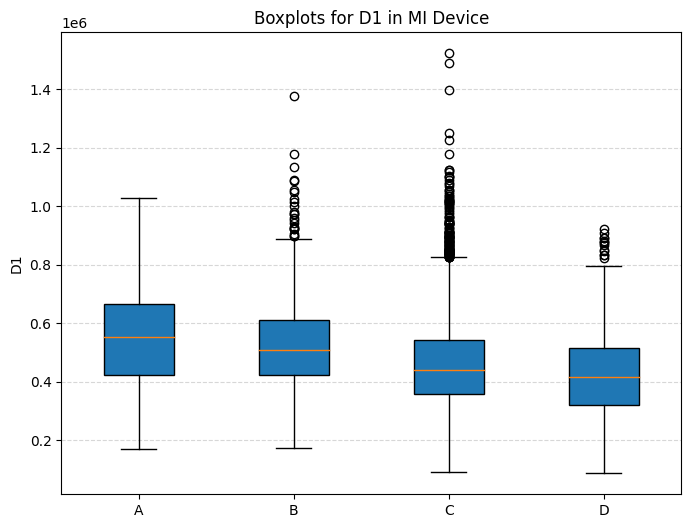

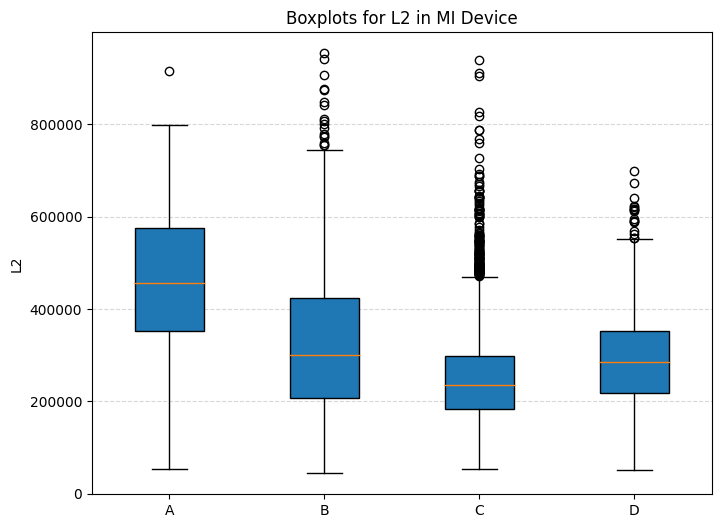

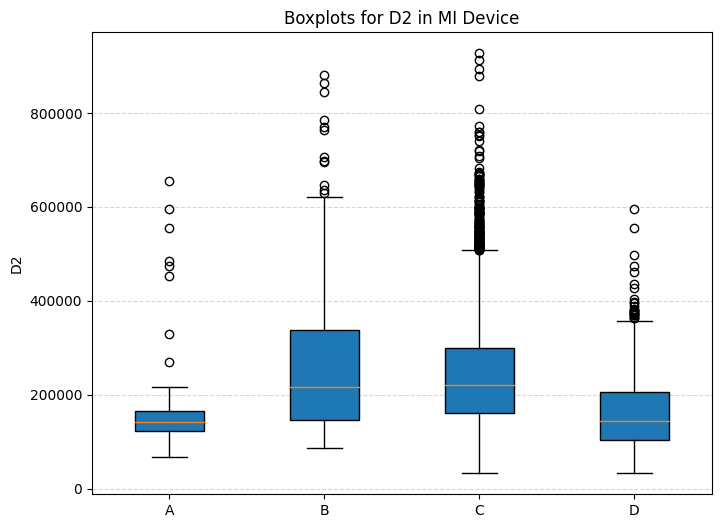

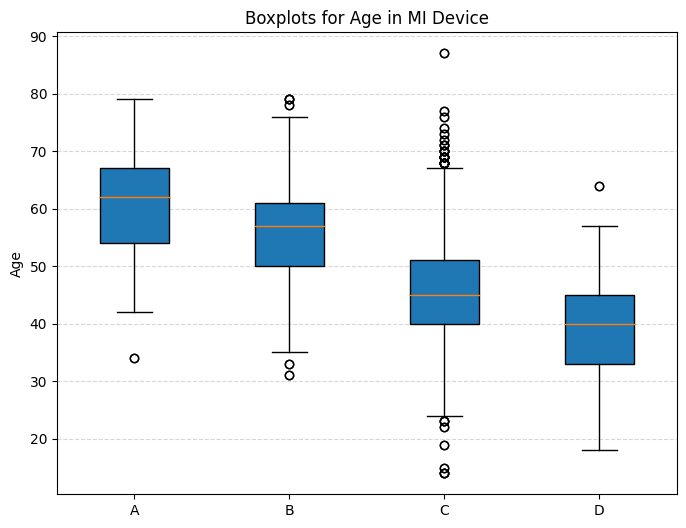

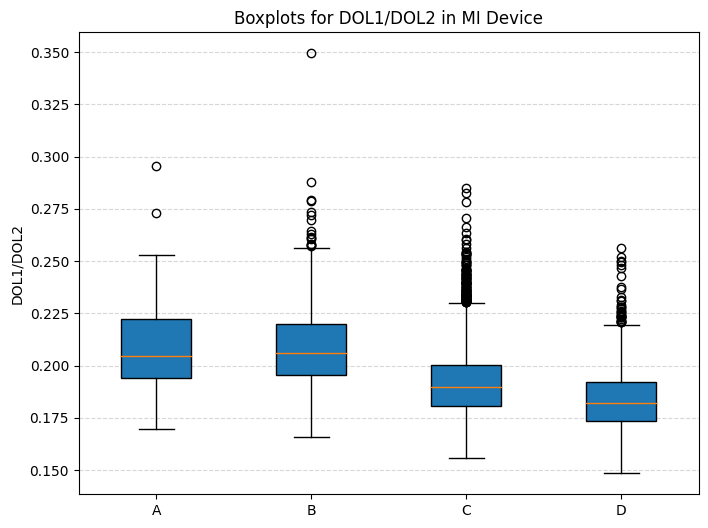

In [5]:
import matplotlib.pyplot as plt

feature_names = [
    "Bm", "DOL1", "DOL2", "e1", "e2", "e2/e1", "e3", "e4", "E",
    "Q", "Q1", "Q2", "vmaxL", "vmaxR", "vmax" , "L1", "D1", "L2", "D2",
    "Age", "DOL1/DOL2"
]

# 1, 3
# Ensure A, B, C, D exist and have correct shape
num_features = len(feature_names)
assert A_array_loaded.shape[1] >= num_features, "Not enough columns in A, B, C, or D arrays."

# Loop through each feature
for i, name in enumerate(feature_names):
    plt.figure(figsize=(8, 6))
    plt.boxplot([A_array_loaded[:, i], B_array_loaded[:, i], C_array_loaded[:, i], D_array_loaded[:, i]], 
                labels=['A', 'B', 'C', 'D'], patch_artist=True)
    
    plt.title(f"Boxplots for {name} in MI Device")
    plt.ylabel(name)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


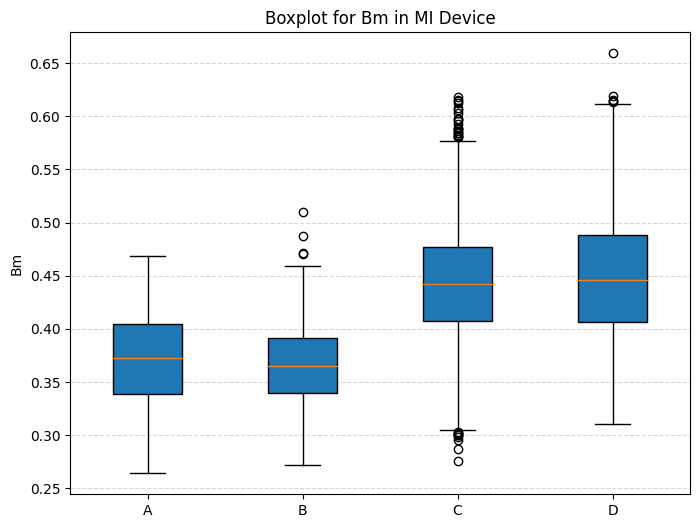

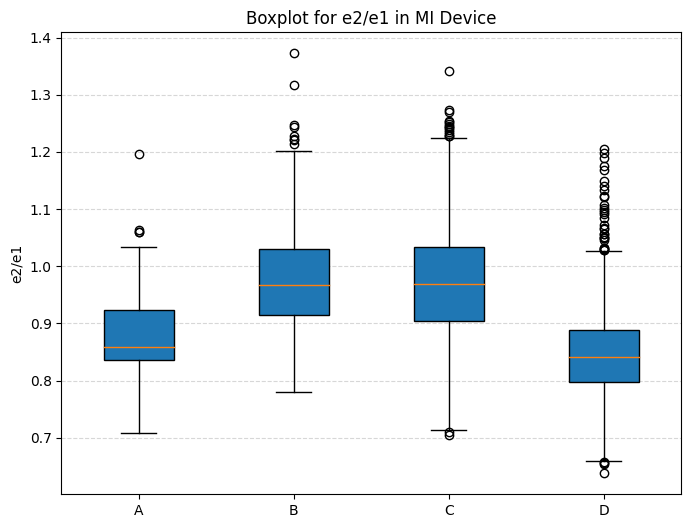

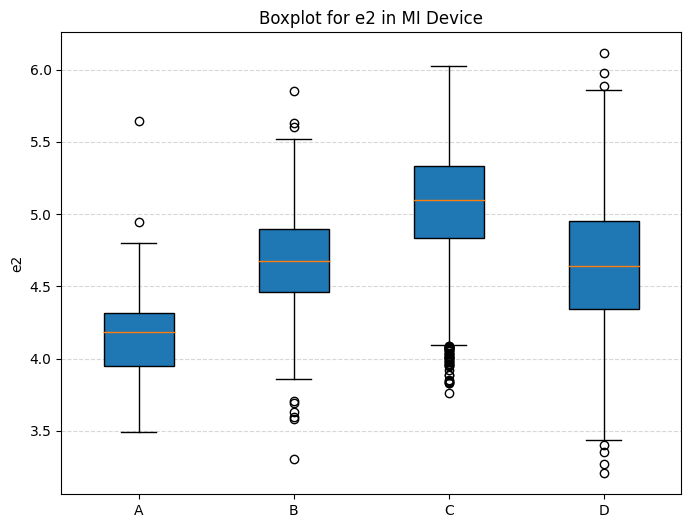

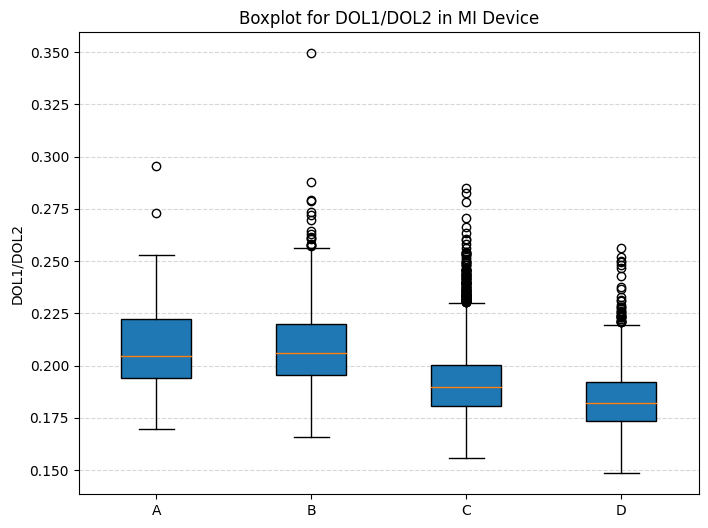

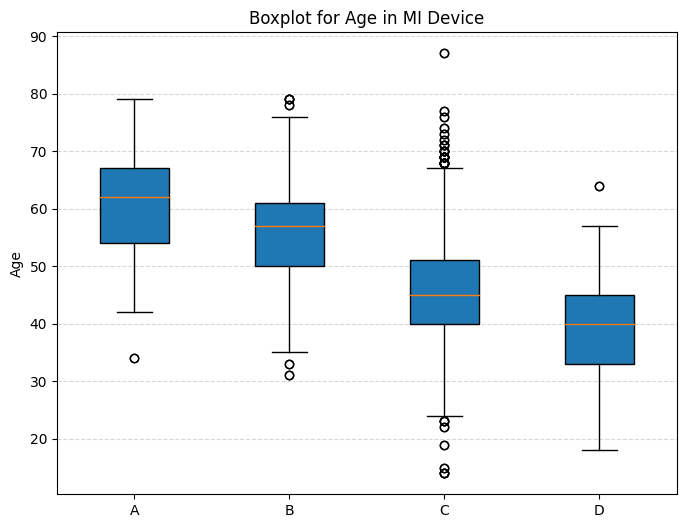

In [6]:
feature_names = [
    "Bm", "DOL1", "DOL2", "e1", "e2", "e2/e1", "e3", "e4", "E",
    "Q", "Q1", "Q2", "vmaxL", "vmaxR", "vmax" , "L1", "D1", "L2", "D2",
    "Age", "DOL1/DOL2"
]

# Selected feature indices
selected_indices = [0, 5, 4, 20, 19]

# Safety check
assert A_array_loaded.shape[1] >= len(feature_names), "Not enough columns in A, B, C, or D arrays."

# Plot only selected features
for i in selected_indices:
    name = feature_names[i]
    plt.figure(figsize=(8, 6))
    plt.boxplot([A_array_loaded[:, i], B_array_loaded[:, i], C_array_loaded[:, i], D_array_loaded[:, i]], 
                labels=['A', 'B', 'C', 'D'], 
                patch_artist=True)
    
    plt.title(f"Boxplot for {name} in MI Device")
    plt.ylabel(name)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    #0, 4, 8, 7, 11


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import backend as K

# Combine all datasets
X = np.concatenate([
    A_array_loaded,
    B_array_loaded,
    C_array_loaded,
    D_array_loaded
], axis=0)

y = np.array(
    [0]*len(A_array_loaded) +
    [1]*len(B_array_loaded) +
    [2]*len(C_array_loaded) +
    [3]*len(D_array_loaded)
)

# normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split dataset 80-20%
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

################3
#One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

#Build a simple DNN model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Save best model callback
checkpoint = ModelCheckpoint(
    'best_model_ALLp.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

################33
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=20,
    batch_size=8,
    callbacks=[checkpoint],
    verbose=1
)

#we load best saved model
best_model = tf.keras.models.load_model('best_model_ALLp.h5')

# /->Final evaluation
loss, acc = best_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n Best Model Test Accuracy: {acc:.4f}")

y_pred = np.argmax(best_model.predict(X_test), axis=1)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/20
756/763 [============================>.] - ETA: 0s - loss: 0.7526 - accuracy: 0.7282
Epoch 1: val_accuracy improved from -inf to 0.79934, saving model to best_model_ALLp.h5
763/763 [==============================] - 6s 7ms/step - loss: 0.7535 - accuracy: 0.7279 - val_loss: 0.5260 - val_accuracy: 0.7993
Epoch 2/20
756/763 [============================>.] - ETA: 0s - loss: 0.5162 - accuracy: 0.8044
Epoch 2: val_accuracy improved from 0.79934 to 0.81770, saving model to best_model_ALLp.h5
763/763 [==============================] - 5s 7ms/step - loss: 0.5159 - accuracy: 0.8047 - val_loss: 0.4778 - val_accuracy: 0.8177
Epoch 3/20
756/763 [============================>.] - ETA: 0s - loss: 0.4861 - accuracy: 0.8034
Epoch 3: val_accuracy improved from 0.81770 to 0.82492, saving model to best_model_ALLp.h5
763/763 [==============================] - 5s 7ms/step - loss: 0.4857 - accuracy: 0.8042 - val_loss: 0.4557 - val_accuracy: 0.8249
Epoch 4/20
760/763 [============================>

C:\Users\Perdorues\.conda\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Perdorues\.conda\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Perdorues\.conda\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
#we can reduse the number of parameters from the analizsis and to ose thet we have identif above and analzsed in file "indipendence_of_variables"
# ... Combine all datasets ...->
X = np.concatenate([
    A_array_loaded[:, (0, 5, 4, 20, 19)],
    B_array_loaded[:, (0, 5, 4, 20, 19)],
    C_array_loaded[:, (0, 5, 4, 20, 19)],
    D_array_loaded[:, (0, 5, 4, 20, 19)]
], axis=0)

y = np.array(
    [0]*len(A_array_loaded) +
    [1]*len(B_array_loaded) +
    [2]*len(C_array_loaded) +
    [3]*len(D_array_loaded)
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint(
    'best_model_4k4P.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=20,
    batch_size=8,
    callbacks=[checkpoint],
    verbose=1
)

best_model = tf.keras.models.load_model('best_model_4k4P.h5')

loss, acc = best_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n Best Model Test Accuracy: {acc:.4f}")
y_pred = np.argmax(best_model.predict(X_test), axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/20
762/763 [============================>.] - ETA: 0s - loss: 0.7503 - accuracy: 0.7534
Epoch 1: val_accuracy improved from -inf to 0.81770, saving model to best_model_4k4P.h5
763/763 [==============================] - 6s 7ms/step - loss: 0.7504 - accuracy: 0.7534 - val_loss: 0.5217 - val_accuracy: 0.8177
Epoch 2/20
760/763 [============================>.] - ETA: 0s - loss: 0.5155 - accuracy: 0.8020
Epoch 2: val_accuracy did not improve from 0.81770
763/763 [==============================] - 5s 7ms/step - loss: 0.5153 - accuracy: 0.8017 - val_loss: 0.4755 - val_accuracy: 0.8177
Epoch 3/20
757/763 [============================>.] - ETA: 0s - loss: 0.4779 - accuracy: 0.8169
Epoch 3: val_accuracy did not improve from 0.81770
763/763 [==============================] - 5s 7ms/step - loss: 0.4780 - accuracy: 0.8167 - val_loss: 0.4698 - val_accuracy: 0.8118
Epoch 4/20
756/763 [============================>.] - ETA: 0s - loss: 0.4660 - accuracy: 0.8163
Epoch 4: val_accuracy did not imp

C:\Users\Perdorues\.conda\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Perdorues\.conda\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Perdorues\.conda\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:

X = np.concatenate([
    A_array_loaded[:, (0, 5, 4, 20, 19)],
    B_array_loaded[:, (0, 5, 4, 20, 19)],
    C_array_loaded[:, (0, 5, 4, 20, 19)],
    D_array_loaded[:, (0, 5, 4, 20, 19)]
], axis=0)

y = np.array(
    [0]*(len(A_array_loaded) + len(B_array_loaded)) +
    [1]*(len(C_array_loaded) + len(D_array_loaded))

)

# - Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# encode labels
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu'),
    layers.Dense(2, activation='softmax')
])
# Compile   
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint(
    'best_model_2p.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

#### Train
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=20,
    batch_size=8,
    callbacks=[checkpoint],
    verbose=1
)

best_model = tf.keras.models.load_model('best_model_2p.h5')

#evaluation
loss, acc = best_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n Best Model Test Accuracy: {acc:.4f}")


y_pred = np.argmax(best_model.predict(X_test), axis=1)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/20
757/763 [============================>.] - ETA: 0s - loss: 0.2743 - accuracy: 0.9131
Epoch 1: val_accuracy improved from -inf to 0.94033, saving model to best_model_2p.h5
763/763 [==============================] - 6s 7ms/step - loss: 0.2727 - accuracy: 0.9136 - val_loss: 0.1642 - val_accuracy: 0.9403
Epoch 2/20
758/763 [============================>.] - ETA: 0s - loss: 0.1913 - accuracy: 0.9255
Epoch 2: val_accuracy improved from 0.94033 to 0.94885, saving model to best_model_2p.h5
763/763 [==============================] - 5s 7ms/step - loss: 0.1917 - accuracy: 0.9255 - val_loss: 0.1544 - val_accuracy: 0.9489
Epoch 3/20
755/763 [============================>.] - ETA: 0s - loss: 0.1785 - accuracy: 0.9291
Epoch 3: val_accuracy improved from 0.94885 to 0.95148, saving model to best_model_2p.h5
763/763 [==============================] - 5s 7ms/step - loss: 0.1780 - accuracy: 0.9295 - val_loss: 0.1446 - val_accuracy: 0.9515
Epoch 4/20
761/763 [============================>.] - E

In [12]:
# focal loss and all parametres for 2 clases AB vs CD

X = np.concatenate([
    A_array_loaded,
    B_array_loaded,
    C_array_loaded,
    D_array_loaded
], axis=0)

# Binary labels: AB = 0, CD = 1
y = np.array(
    [0]*(len(A_array_loaded) + len(B_array_loaded)) +
    [1]*(len(C_array_loaded) + len(D_array_loaded))
)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# One-hot encode
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# ---  Focal Loss ---
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        cross_entropy = -y_true * K.log(y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma)
        loss = weight * cross_entropy
        return K.sum(loss, axis=1)
    return focal_loss_fixed

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile with focal loss
model.compile(
    optimizer='adam',
    loss=focal_loss(alpha=0.46, gamma=2.0),  
    metrics=['accuracy']
)

# Callback for best model
checkpoint = ModelCheckpoint(
    'best_model_focal.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=20,
    batch_size=8,
    callbacks=[checkpoint],
    verbose=1
)

# Load best saved model
best_model = tf.keras.models.load_model(
    'best_model_focal.h5',
    custom_objects={'focal_loss_fixed': focal_loss(alpha=0.46, gamma=2.0)}
)

# Evaluate
loss, acc = best_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nBest Model Test Accuracy: {acc:.4f}")

### Predictions
y_pred = np.argmax(best_model.predict(X_test), axis=1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/20
755/763 [============================>.] - ETA: 0s - loss: 0.0391 - accuracy: 0.8848
Epoch 1: val_accuracy improved from -inf to 0.94033, saving model to best_model_focal.h5
763/763 [==============================] - 7s 9ms/step - loss: 0.0393 - accuracy: 0.8849 - val_loss: 0.0209 - val_accuracy: 0.9403
Epoch 2/20
759/763 [============================>.] - ETA: 0s - loss: 0.0233 - accuracy: 0.9270
Epoch 2: val_accuracy improved from 0.94033 to 0.94623, saving model to best_model_focal.h5
763/763 [==============================] - 6s 8ms/step - loss: 0.0233 - accuracy: 0.9270 - val_loss: 0.0188 - val_accuracy: 0.9462
Epoch 3/20
760/763 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 0.9314
Epoch 3: val_accuracy did not improve from 0.94623
763/763 [==============================] - 6s 8ms/step - loss: 0.0210 - accuracy: 0.9313 - val_loss: 0.0180 - val_accuracy: 0.9462
Epoch 4/20
761/763 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy

## 5 fold validation for 4 class (A-D)


 -> Fold 1
48/48 [==============================] - 0s 3ms/step
Fold 1: ACC=0.837, AUC=0.891, F1=0.811, SEN=0.837

 -> Fold 2
48/48 [==============================] - 0s 2ms/step
Fold 2: ACC=0.833, AUC=0.910, F1=0.805, SEN=0.833

 -> Fold 3
48/48 [==============================] - 0s 2ms/step
Fold 3: ACC=0.818, AUC=0.891, F1=0.788, SEN=0.818

 -> Fold 4
48/48 [==============================] - 0s 2ms/step
Fold 4: ACC=0.839, AUC=0.900, F1=0.819, SEN=0.839

 -> Fold 5
48/48 [==============================] - 0s 2ms/step
Fold 5: ACC=0.823, AUC=0.867, F1=0.788, SEN=0.823


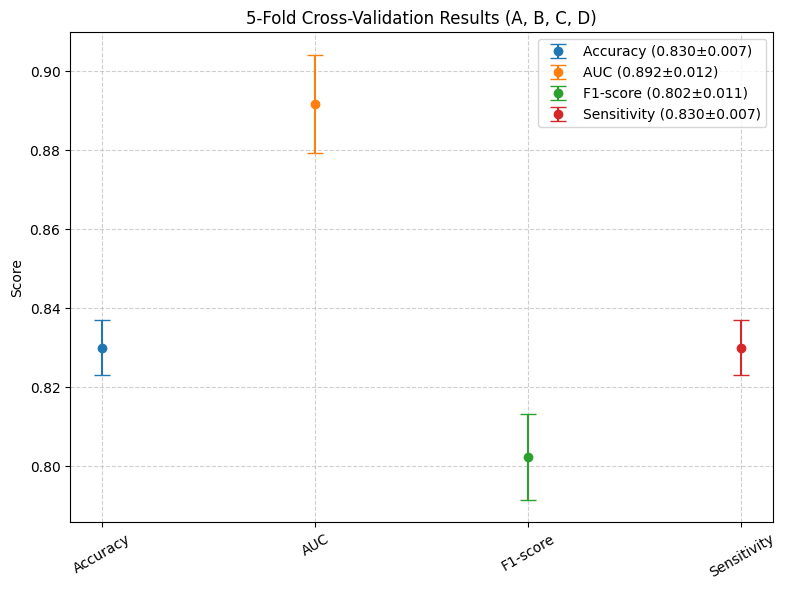


 Best model saved as: best_model_5fold_4_Classes.keras


In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import recall_score



X = np.concatenate([
    A_array_loaded[:, (0, 5, 4, 20, 19)],
    B_array_loaded[:, (0, 5, 4, 20, 19)],
    C_array_loaded[:, (0, 5, 4, 20, 19)],
    D_array_loaded[:, (0, 5, 4, 20, 19)]
], axis=0)

y = np.array(
    [0]*len(A_array_loaded) + 
    [1]*len(B_array_loaded) +
    [2]*len(C_array_loaded) + 
    [3]*len(D_array_loaded)
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

accs, aucs, f1s, sens = [], [], [], []
best_auc = -1
best_model = None

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_scaled, y), 1):
    print(f"\n -> Fold {fold}")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    y_train_cat = to_categorical(y_train, num_classes=4)
    y_test_cat = to_categorical(y_test, num_classes=4)

    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss=focal_loss(alpha=0.46, gamma=2.0),  # tuned values
        metrics=['accuracy']
    )

    history = model.fit(
        X_train, y_train_cat,
        validation_data=(X_test, y_test_cat),
        epochs=20,
        batch_size=8,
        verbose=0
    )

    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    f1 = f1_score(y_test, y_pred, average='weighted')
    sensitivity = recall_score(y_test, y_pred, average='weighted') 


    accs.append(acc)
    aucs.append(auc)
    f1s.append(f1)
    sens.append(sensitivity)

    print(f"Fold {fold}: ACC={acc:.3f}, AUC={auc:.3f}, F1={f1:.3f}, SEN={sensitivity:.3f}")

    if auc > best_auc:
        best_auc = auc
        best_model = model
        model.save("best_model_5fold_4_Classes.keras")


accs, aucs, f1s, sens = map(np.array, [accs, aucs, f1s, sens])


def mean_ci(data):
    mean = np.mean(data)
    ci = 1.96 * np.std(data) / np.sqrt(len(data))
    return mean, ci

metrics = {
    "Accuracy": accs,
    "AUC": aucs,
    "F1-score": f1s,
    "Sensitivity": sens,
}

plt.figure(figsize=(8, 6))
for i, (name, values) in enumerate(metrics.items()):
    mean, ci = mean_ci(values)
    plt.errorbar(i, mean, yerr=ci, fmt='o', capsize=6, label=f"{name} ({mean:.3f}±{ci:.3f})")

plt.xticks(range(len(metrics)), metrics.keys(), rotation=30)
plt.ylabel("Score")
plt.title("5-Fold Cross-Validation Results (A, B, C, D)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print("\n Best model saved as: best_model_5fold_4_Classes.keras")

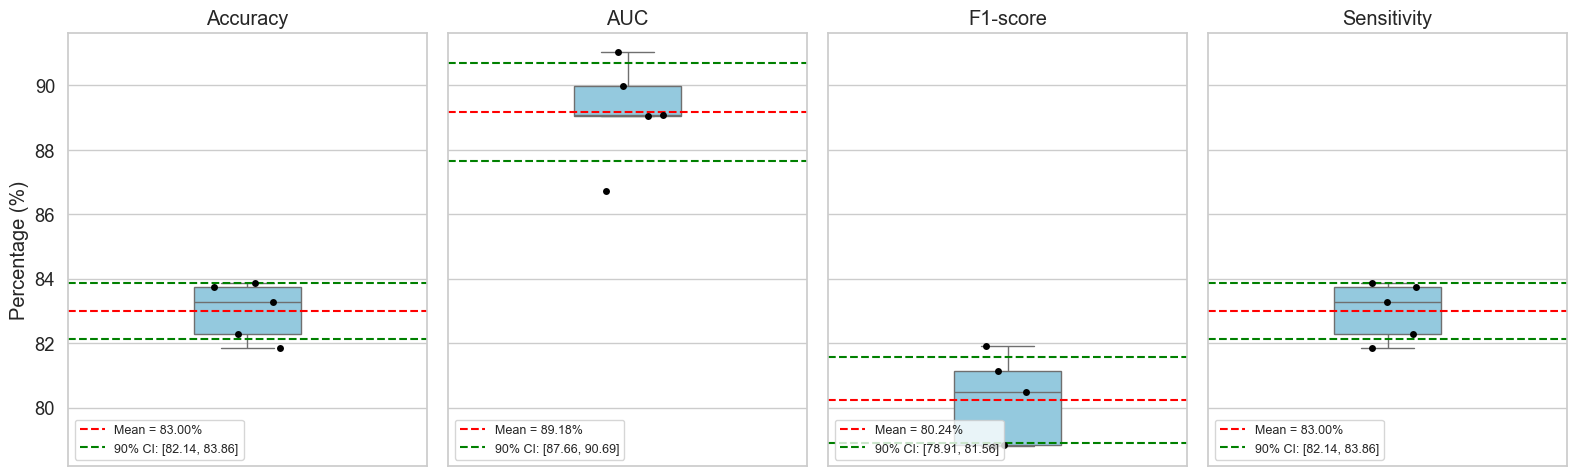

In [15]:
import seaborn as sns
from scipy import stats

ACC = accs
AUC = aucs
F1  = f1s
SEN = sens

metrics = {"Accuracy": ACC, "AUC": AUC, "F1-score":  F1, "Sensitivity":  SEN}

def confidence_interval(data, confidence=0.90):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - h, mean + h

# Prepare plot 
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)

for i, (name, values) in enumerate(metrics.items()):
    mean, low, high = confidence_interval(values)
    ax = axes[i]

    # Boxplot
    sns.boxplot(y=values*100, ax=ax, color="skyblue", width=0.3, fliersize=0)
    # Individual points
    sns.stripplot(y=values*100, ax=ax, color="black", size=5, jitter=0.1)
    
    # Mean + CI lines
    ax.axhline(mean*100, color="red", linestyle="--", label=f"Mean = {mean*100:.2f}%")
    ax.axhline(low*100, color="green", linestyle="--", label=f"90% CI: [{low*100:.2f}, {high*100:.2f}]")
    ax.axhline(high*100, color="green", linestyle="--")
    
    ax.set_title(name)
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)')
    #ax.set_ylim(90, 100)
    ax.legend(loc='lower left', fontsize=9)

plt.tight_layout()
plt.show()


## 5 fold validation for 2 class (AB vs CD)


 -> Fold 1
Epoch 1/20
763/763 [==============================] - 7s 8ms/step - loss: 0.0326 - accuracy: 0.8975 - val_loss: 0.0237 - val_accuracy: 0.9141
Epoch 2/20
763/763 [==============================] - 6s 8ms/step - loss: 0.0237 - accuracy: 0.9251 - val_loss: 0.0211 - val_accuracy: 0.9311
Epoch 3/20
763/763 [==============================] - 6s 8ms/step - loss: 0.0213 - accuracy: 0.9337 - val_loss: 0.0208 - val_accuracy: 0.9285
Epoch 4/20
763/763 [==============================] - 6s 8ms/step - loss: 0.0210 - accuracy: 0.9360 - val_loss: 0.0202 - val_accuracy: 0.9325
Epoch 5/20
763/763 [==============================] - 6s 8ms/step - loss: 0.0196 - accuracy: 0.9400 - val_loss: 0.0201 - val_accuracy: 0.9266
Epoch 6/20
763/763 [==============================] - 6s 8ms/step - loss: 0.0198 - accuracy: 0.9400 - val_loss: 0.0195 - val_accuracy: 0.9331
Epoch 7/20
763/763 [==============================] - 6s 8ms/step - loss: 0.0198 - accuracy: 0.9374 - val_loss: 0.0198 - val_accuracy: 0

Epoch 17/20
763/763 [==============================] - 6s 8ms/step - loss: 0.0192 - accuracy: 0.9375 - val_loss: 0.0191 - val_accuracy: 0.9344
Epoch 18/20
763/763 [==============================] - 6s 8ms/step - loss: 0.0195 - accuracy: 0.9375 - val_loss: 0.0188 - val_accuracy: 0.9364
Epoch 19/20
763/763 [==============================] - 6s 8ms/step - loss: 0.0194 - accuracy: 0.9380 - val_loss: 0.0185 - val_accuracy: 0.9436
Epoch 20/20
48/48 [==============================] - 0s 2ms/step
Fold 3: ACC=0.951, AUC=0.949, F1=0.947, SEN=0.990

 -> Fold 4
Epoch 1/20
763/763 [==============================] - 7s 8ms/step - loss: 0.0630 - accuracy: 0.8026 - val_loss: 0.0319 - val_accuracy: 0.9180
Epoch 2/20
763/763 [==============================] - 6s 8ms/step - loss: 0.0290 - accuracy: 0.9239 - val_loss: 0.0242 - val_accuracy: 0.9357
Epoch 3/20
763/763 [==============================] - 6s 8ms/step - loss: 0.0245 - accuracy: 0.9305 - val_loss: 0.0215 - val_accuracy: 0.9377
Epoch 4/20
763/763

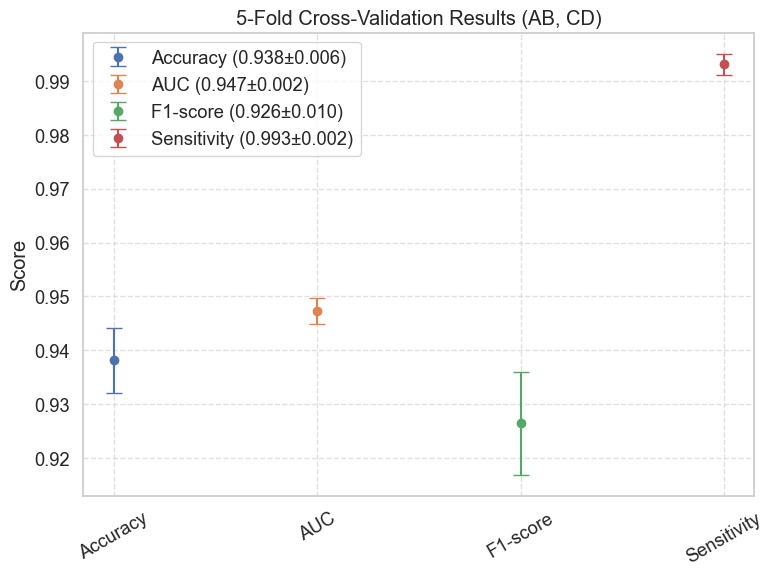


 Best model saved as: best_model_5fold_2_Classes.keras


In [16]:

X = np.concatenate([
    A_array_loaded[:, (0, 5, 4, 20, 19)],
    B_array_loaded[:, (0, 5, 4, 20, 19)],
    C_array_loaded[:, (0, 5, 4, 20, 19)],
    D_array_loaded[:, (0, 5, 4, 20, 19)]
], axis=0)

y = np.array(
    [0]*(len(A_array_loaded) + len(B_array_loaded)) +
    [1]*(len(C_array_loaded) + len(D_array_loaded)) 

)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs1, aucs1, f1s1, sens1 = [], [], [], []
best_auc = -1
best_model = None

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_scaled, y), 1):
    print(f"\n -> Fold {fold}")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    y_train_cat = to_categorical(y_train, num_classes=2)
    y_test_cat = to_categorical(y_test, num_classes=2)

    # --- Model ---
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(8, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss=focal_loss(alpha=0.46, gamma=2.0),  # tr values
        metrics=['accuracy']
    )

    history = model.fit(
        X_train, y_train_cat,
        validation_data=(X_test, y_test_cat),
        epochs=20,
        batch_size=8,
        verbose=1
    )

    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Confusion matrixe
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    accs1.append(acc)
    aucs1.append(auc)
    f1s1.append(f1)
    sens1.append(sensitivity)

    print(f"Fold {fold}: ACC={acc:.3f}, AUC={auc:.3f}, F1={f1:.3f}, SEN={sensitivity:.3f}")

    #  best model s
    if auc > best_auc:
        best_auc = auc
        best_model = model
        model.save("best_model_5fold_2_Classes.keras")


accs1, aucs1, f1s1, sens1 = map(np.array, [accs1, aucs1, f1s1, sens1])


metrics = {
    "Accuracy": accs1,
    "AUC": aucs1,
    "F1-score": f1s1,
    "Sensitivity": sens1,
}

plt.figure(figsize=(8, 6))
for i, (name, values) in enumerate(metrics.items()):
    mean, ci = mean_ci(values)
    plt.errorbar(i, mean, yerr=ci, fmt='o', capsize=6, label=f"{name} ({mean:.3f}±{ci:.3f})")

plt.xticks(range(len(metrics)), metrics.keys(), rotation=30)
plt.ylabel("Score")
plt.title("5-Fold Cross-Validation Results (AB, CD)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

ACC = accs1
AUC = aucs1
F1  = f1s1
SEN = sens1

metrics = {"Accuracy": ACC, "AUC": AUC, "F1-score":  F1, "Sensitivity":  SEN}

#PLOT rez
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)

for i, (name, values) in enumerate(metrics.items()):
    mean, low, high = confidence_interval(values)
    ax = axes[i]

    sns.boxplot(y=values*100, ax=ax, color="skyblue", width=0.3, fliersize=0)
    sns.stripplot(y=values*100, ax=ax, color="black", size=5, jitter=0.1)
    
    ax.axhline(mean*100, color="red", linestyle="--", label=f"Mean = {mean*100:.2f}%")
    ax.axhline(low*100, color="green", linestyle="--", label=f"90% CI: [{low*100:.2f}, {high*100:.2f}]")
    ax.axhline(high*100, color="green", linestyle="--")
    
    ax.set_title(name)
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)')
    ax.legend(loc='lower left', fontsize=9)

plt.tight_layout()
plt.show()


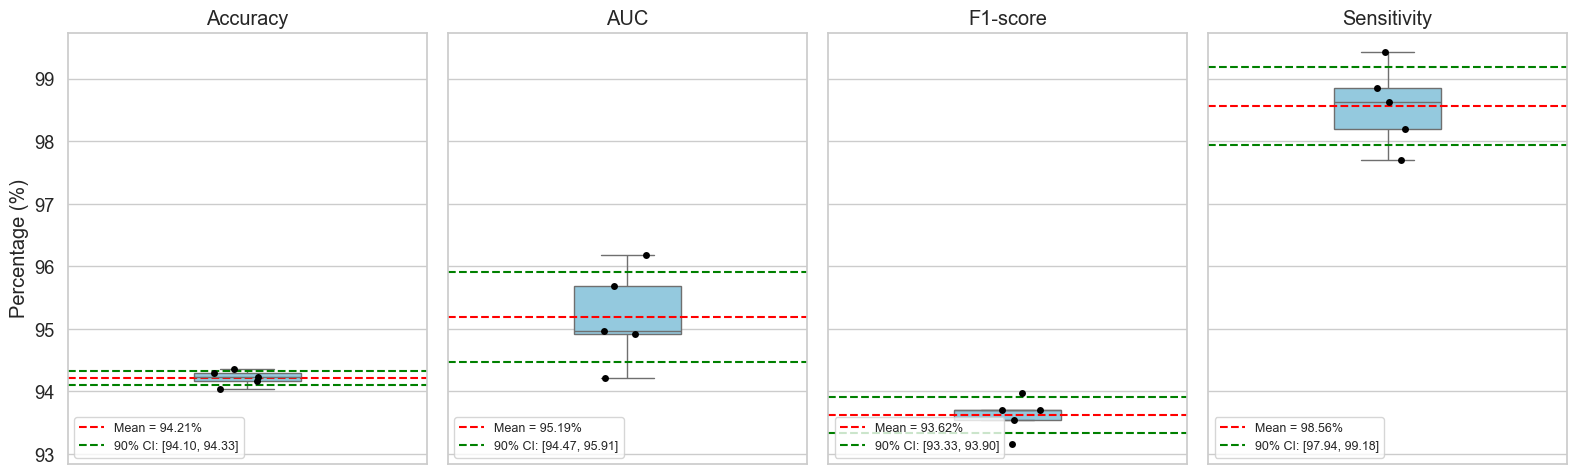

In [44]:
# Data 4 clsf AB vs CD 
ACC = accs1
AUC = aucs1
F1  = f1s1
SEN = sens1

metrics = {"Accuracy": ACC, "AUC": AUC, "F1-score":  F1, "Sensitivity":  SEN}

#PLOT
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)

for i, (name, values) in enumerate(metrics.items()):
    mean, low, high = confidence_interval(values)
    ax = axes[i]

    # Boxplot
    sns.boxplot(y=values*100, ax=ax, color="skyblue", width=0.3, fliersize=0)
    sns.stripplot(y=values*100, ax=ax, color="black", size=5, jitter=0.1)
    
    ax.axhline(mean*100, color="red", linestyle="--", label=f"Mean = {mean*100:.2f}%")
    ax.axhline(low*100, color="green", linestyle="--", label=f"90% CI: [{low*100:.2f}, {high*100:.2f}]")
    ax.axhline(high*100, color="green", linestyle="--")
    
    ax.set_title(name)
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)')
    ax.legend(loc='lower left', fontsize=9)

plt.tight_layout()
plt.show()


### Results for 3 Run for every fold, 5 fold validation


   RUN 1/3
Run 1 | Fold 1: ACC=0.833, AUC=0.892, F1=0.799, SEN=0.833
Run 1 | Fold 2: ACC=0.839, AUC=0.913, F1=0.824, SEN=0.839
Run 1 | Fold 3: ACC=0.814, AUC=0.896, F1=0.781, SEN=0.814
Run 1 | Fold 4: ACC=0.837, AUC=0.911, F1=0.809, SEN=0.837
Run 1 | Fold 5: ACC=0.820, AUC=0.870, F1=0.779, SEN=0.820

   RUN 2/3
Run 2 | Fold 1: ACC=0.831, AUC=0.889, F1=0.794, SEN=0.831
Run 2 | Fold 2: ACC=0.823, AUC=0.913, F1=0.783, SEN=0.823
Run 2 | Fold 3: ACC=0.823, AUC=0.892, F1=0.794, SEN=0.823
Run 2 | Fold 4: ACC=0.831, AUC=0.913, F1=0.791, SEN=0.831
Run 2 | Fold 5: ACC=0.810, AUC=0.861, F1=0.758, SEN=0.810

   RUN 3/3
Run 3 | Fold 1: ACC=0.838, AUC=0.892, F1=0.812, SEN=0.838
Run 3 | Fold 2: ACC=0.831, AUC=0.910, F1=0.798, SEN=0.831
Run 3 | Fold 3: ACC=0.819, AUC=0.890, F1=0.791, SEN=0.819
Run 3 | Fold 4: ACC=0.840, AUC=0.911, F1=0.820, SEN=0.840
Run 3 | Fold 5: ACC=0.825, AUC=0.864, F1=0.796, SEN=0.825


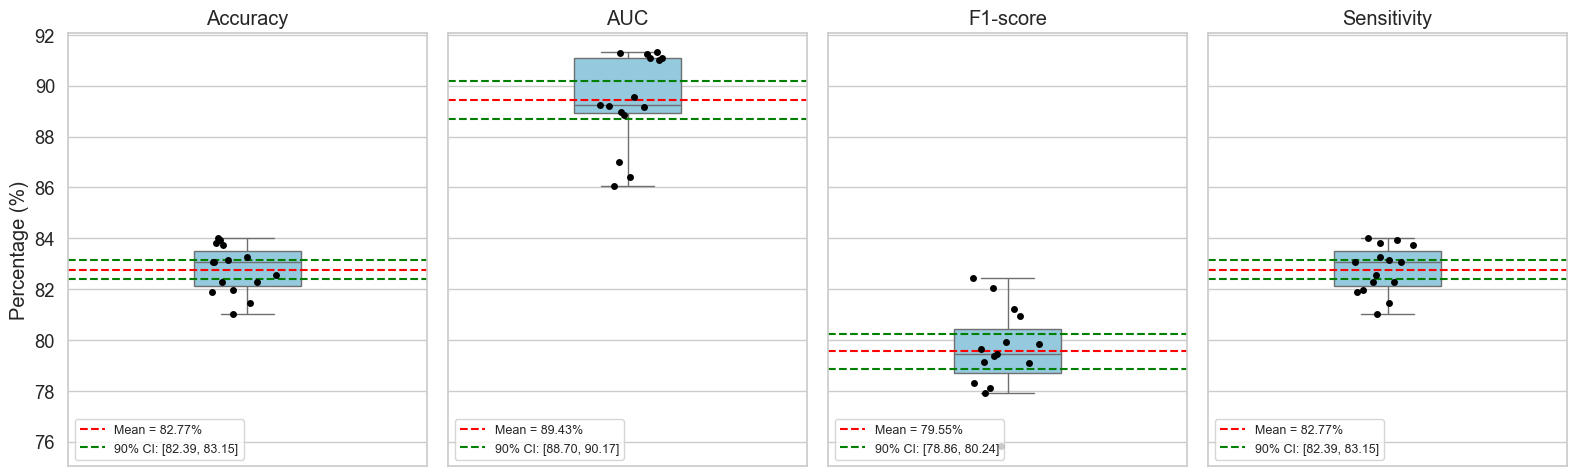


✅ Best model saved as: best_model_5fold_4Classes.keras


In [20]:


# Confidence Interval Helpers
def mean_ci(values, ci=1.96):
    mean = np.mean(values)
    std = np.std(values)
    return mean, std / np.sqrt(len(values)) * ci

def confidence_interval(values, confidence=0.90):
    mean = np.mean(values)
    std = np.std(values)
    n = len(values)
    margin = 1.645 * std / np.sqrt(n)  # 90% CI
    return mean, mean - margin, mean + margin

X = np.concatenate([
    A_array_loaded[:, (0, 5, 4, 20, 19)],
    B_array_loaded[:, (0, 5, 4, 20, 19)],
    C_array_loaded[:, (0, 5, 4, 20, 19)],
    D_array_loaded[:, (0, 5, 4, 20, 19)]
], axis=0)

y = np.array(
    [0]*len(A_array_loaded) +
    [1]*len(B_array_loaded) +
    [2]*len(C_array_loaded) +
    [3]*len(D_array_loaded)
)

# Scale features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Setup for 3 runs × 5 fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs_all, aucs_all, f1s_all, sens_all = [], [], [], []
best_auc = -1
best_model = None

for run in range(1, 4):
    print(f"\n========================")
    print(f"   RUN {run}/3")
    print(f"========================")

    for fold, (train_idx, test_idx) in enumerate(kfold.split(X_scaled, y), 1):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        y_train_cat = to_categorical(y_train, num_classes=4)
        y_test_cat = to_categorical(y_test, num_classes=4)

        # Model definition
        model = models.Sequential([
            layers.Input(shape=(X_train.shape[1],)),
            layers.Dense(32, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(16, activation='relu'),
            layers.Dense(4, activation='softmax')
        ])

        model.compile(
            optimizer='adam',
            loss=focal_loss(alpha=0.46, gamma=2.0),
            metrics=['accuracy']
        )

        model.fit(
            X_train, y_train_cat,
            validation_data=(X_test, y_test_cat),
            epochs=20,
            batch_size=8,
            verbose=0
        )

        # Predict 
        y_pred_proba = model.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred_proba, axis=1)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        f1 = f1_score(y_test, y_pred, average='weighted')
        sensitivity = recall_score(y_test, y_pred, average='weighted')

        accs_all.append(acc)
        aucs_all.append(auc)
        f1s_all.append(f1)
        sens_all.append(sensitivity)

        print(f"Run {run} | Fold {fold}: ACC={acc:.3f}, AUC={auc:.3f}, F1={f1:.3f}, SEN={sensitivity:.3f}")

        if auc > best_auc:
            best_auc = auc
            best_model = model
            model.save("best_model_5fold_4Classes.keras")
#Convert to arrays
accs_all, aucs_all, f1s_all, sens_all = map(np.array, [accs_all, aucs_all, f1s_all, sens_all])

metrics = {
    "Accuracy": accs_all,
    "AUC": aucs_all,
    "F1-score": f1s_all,
    "Sensitivity": sens_all
}

# Visualization
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)

for i, (name, values) in enumerate(metrics.items()):
    mean, low, high = confidence_interval(values)
    ax = axes[i]

    sns.boxplot(y=values * 100, ax=ax, color="skyblue", width=0.3, fliersize=0)
    sns.stripplot(y=values * 100, ax=ax, color="black", size=5, jitter=0.1)

    ax.axhline(mean * 100, color="red", linestyle="--", label=f"Mean = {mean*100:.2f}%")
    ax.axhline(low * 100, color="green", linestyle="--", label=f"90% CI: [{low*100:.2f}, {high*100:.2f}]")
    ax.axhline(high * 100, color="green", linestyle="--")

    ax.set_title(name)
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)')
    ax.legend(loc='lower left', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✅ Best model saved as: best_model_5fold_4Classes.keras")



   RUN 1/3
Run 1 | Fold 1: ACC=0.932, AUC=0.952, F1=0.918, SEN=0.994
Run 1 | Fold 2: ACC=0.932, AUC=0.949, F1=0.914, SEN=0.999
Run 1 | Fold 3: ACC=0.941, AUC=0.951, F1=0.929, SEN=0.998
Run 1 | Fold 4: ACC=0.946, AUC=0.952, F1=0.942, SEN=0.982
Run 1 | Fold 5: ACC=0.937, AUC=0.938, F1=0.927, SEN=0.991

   RUN 2/3
Run 2 | Fold 1: ACC=0.937, AUC=0.946, F1=0.929, SEN=0.987
Run 2 | Fold 2: ACC=0.934, AUC=0.950, F1=0.916, SEN=0.999
Run 2 | Fold 3: ACC=0.936, AUC=0.949, F1=0.920, SEN=0.998
Run 2 | Fold 4: ACC=0.934, AUC=0.949, F1=0.920, SEN=0.995
Run 2 | Fold 5: ACC=0.940, AUC=0.940, F1=0.932, SEN=0.988

   RUN 3/3
Run 3 | Fold 1: ACC=0.934, AUC=0.949, F1=0.920, SEN=0.995
Run 3 | Fold 2: ACC=0.937, AUC=0.949, F1=0.927, SEN=0.990
Run 3 | Fold 3: ACC=0.946, AUC=0.950, F1=0.940, SEN=0.991
Run 3 | Fold 4: ACC=0.939, AUC=0.947, F1=0.930, SEN=0.991
Run 3 | Fold 5: ACC=0.938, AUC=0.937, F1=0.929, SEN=0.990


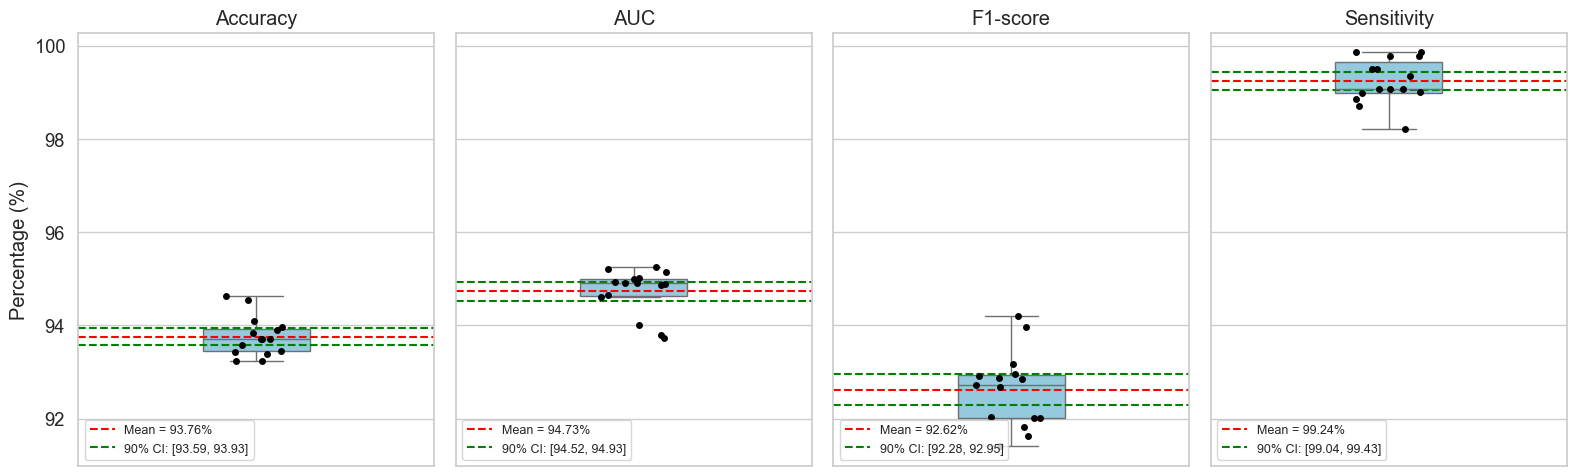

In [17]:

X = np.concatenate([
    A_array_loaded[:, (0, 5, 4, 20, 19)],
    B_array_loaded[:, (0, 5, 4, 20, 19)],
    C_array_loaded[:, (0, 5, 4, 20, 19)],
    D_array_loaded[:, (0, 5, 4, 20, 19)]
], axis=0)

y = np.array(
    [0]*(len(A_array_loaded) + len(B_array_loaded)) +
    [1]*(len(C_array_loaded) + len(D_array_loaded))
)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs_all, aucs_all, f1s_all, sens_all = [], [], [], []

for run in range(1, 4):
    print(f"\n========================")
    print(f"   RUN {run}/3")
    print(f"========================")

    accs, aucs, f1s, sens = [], [], [], []

    for fold, (train_idx, test_idx) in enumerate(kfold.split(X_scaled, y), 1):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        y_train_cat = to_categorical(y_train, num_classes=2)
        y_test_cat = to_categorical(y_test, num_classes=2)

        model = models.Sequential([
            layers.Input(shape=(X_train.shape[1],)),
            layers.Dense(16, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(8, activation='relu'),
            layers.Dense(2, activation='softmax')
        ])
        
        #Adam optimiyer (all works here)
        model.compile(
            optimizer='adam',
            loss=focal_loss(alpha=0.46, gamma=2.0),
            metrics=['accuracy']
        )

        model.fit(
            X_train, y_train_cat,
            validation_data=(X_test, y_test_cat),
            epochs=20,
            batch_size=8,
            verbose=0
        )

        # Predicted c
        y_pred_proba = model.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred_proba, axis=1)

        ## metrics of performance
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        f1 = f1_score(y_test, y_pred, average='weighted')

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

        accs.append(acc)
        aucs.append(auc)
        f1s.append(f1)
        sens.append(sensitivity)

        print(f"Run {run} | Fold {fold}: ACC={acc:.3f}, AUC={auc:.3f}, F1={f1:.3f}, SEN={sensitivity:.3f}")

    accs_all.extend(accs) #we save reyults to plot
    aucs_all.extend(aucs)
    f1s_all.extend(f1s)
    sens_all.extend(sens)

accs_all, aucs_all, f1s_all, sens_all = map(np.array, [accs_all, aucs_all, f1s_all, sens_all])

metrics = {"Accuracy": accs_all, "AUC": aucs_all, "F1-score": f1s_all, "Sensitivity": sens_all}

sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)

for i, (name, values) in enumerate(metrics.items()):
    mean, low, high = confidence_interval(values)
    ax = axes[i]

    sns.boxplot(y=values * 100, ax=ax, color="skyblue", width=0.3, fliersize=0)
    sns.stripplot(y=values * 100, ax=ax, color="black", size=5, jitter=0.1)
    
    ax.axhline(mean * 100, color="red", linestyle="--", label=f"Mean = {mean*100:.2f}%")
    ax.axhline(low * 100, color="green", linestyle="--", label=f"90% CI: [{low*100:.2f}, {high*100:.2f}]")
    ax.axhline(high * 100, color="green", linestyle="--")
    
    ax.set_title(name)
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)')
    ax.legend(loc='lower left', fontsize=9)

plt.tight_layout()
plt.show()
